In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

In [2]:
train_df4 = pd.read_csv('train.csv')
test_df1 = pd.read_csv('test.csv')

In [4]:
train_df4.drop('Cabin',axis=1,inplace=True)
test_df1.drop('Cabin',axis=1,inplace=True)

In [5]:
def impute_median(series):
    return series.fillna(series.median())

In [6]:
by_class_age_train=train_df4.groupby(['Pclass','Sex'])
by_class_age_test=test_df1.groupby(['Pclass','Sex'])
by_fare=test_df1.groupby(['SibSp','Parch','Pclass'])

In [7]:
train_df4['Age'] = by_class_age_train['Age'].transform(impute_median)
test_df1['Age'] = by_class_age_test['Age'].transform(impute_median)
test_df1['Fare'] = by_fare['Fare'].transform(impute_median)

In [8]:
#train_df1['Embarked'] = train_df1.fillna(train_df1['Embarked'].mode()[0])

In [9]:
train_df4.dropna(inplace=True)

In [10]:
train_df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [11]:
test_df1.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

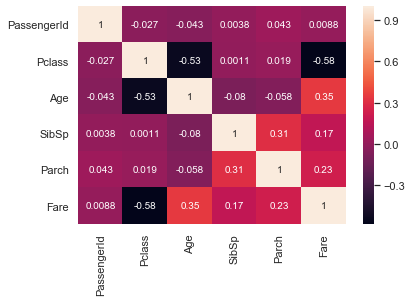

In [12]:
corr=test_df1.corr()
sns.heatmap(corr,annot=True)

In [13]:
train_df4['Sex'] = train_df4['Sex'].map({'female':1,'male':0})

In [14]:
test_df1['Sex'] = test_df1['Sex'].map({'female':1,'male':0})

In [15]:
train_df4.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S


In [16]:
train_df4.drop(['Name','Ticket'],inplace=True,axis=1)
test_df1.drop(['Name','Ticket'],inplace=True,axis=1)

In [17]:
train_df4['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [18]:
embarked_dummies = pd.get_dummies(train_df4['Embarked'],prefix='port')

In [19]:
train_df=pd.concat([train_df4,embarked_dummies],axis=1)

In [20]:
train_df.drop('Embarked',inplace=True,axis=1)

In [21]:
embarked_dummies_test = pd.get_dummies(test_df1['Embarked'],prefix='port')
test_df = pd.concat([test_df1,embarked_dummies_test],axis=1)
test_df.drop('Embarked',inplace=True,axis=1)

In [22]:
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,port_C,port_Q,port_S
0,892,3,0,34.5,0,0,7.8292,0,1,0
1,893,3,1,47.0,1,0,7.0000,0,0,1
2,894,2,0,62.0,0,0,9.6875,0,1,0
3,895,3,0,27.0,0,0,8.6625,0,0,1
4,896,3,1,22.0,1,1,12.2875,0,0,1


In [24]:
feature_col = ['Sex','Pclass','Age','Fare']
X_origin = train_df[feature_col]
y_origin = train_df['Survived']
X_test = test_df[feature_col]
X_train,X_valid,y_train,y_valid = train_test_split(X_origin,y_origin,test_size=0.3,random_state=123)

In [25]:
logreg = LogisticRegression()
lg_model=logreg.fit(X_train,y_train)
lg_pred = logreg.predict(X_valid)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [26]:
print('RMLSE Score: ',np.sqrt(metrics.mean_squared_log_error(lg_pred,y_valid)))

RMLSE Score:  0.32026336185837667


In [27]:
lg_model_retrain = logreg.fit(X_train,y_train)
predict_test = logreg.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [28]:
samplesubmission = pd.read_csv('gender_submission.csv')
samplesubmission['Survived']=predict_test

In [29]:
samplesubmission.to_csv('sampleSubmission.csv',index=False)

In [44]:
train_df['Family Size'] = train_df.SibSp + train_df.Parch + 1
test_df['Family Size'] = test_df.SibSp + test_df.Parch + 1

In [45]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,port_C,port_Q,port_S,Family Size
0,1,0,3,0,22.0,1,0,7.2500,0,0,1,2
1,2,1,1,1,38.0,1,0,71.2833,1,0,0,2
2,3,1,3,1,26.0,0,0,7.9250,0,0,1,1
3,4,1,1,1,35.0,1,0,53.1000,0,0,1,2
4,5,0,3,0,35.0,0,0,8.0500,0,0,1,1


In [69]:
feature_col = ['Sex','Pclass','Age','Fare']
X_origin = train_df[feature_col]
y_origin = train_df['Survived']
X_test = test_df[feature_col]

In [47]:
from sklearn import tree
my_tree_one = tree.DecisionTreeClassifier(criterion='entropy',max_depth = 10,min_samples_split = 5,random_state=43)
tree_model = my_tree_one.fit(X_origin,y_origin)

In [48]:
tree_predict = my_tree_one.predict(X_test)

In [49]:
print('Accuracy Score: ',my_tree_one.score(X_origin,y_origin))

Accuracy Score:  0.9111361079865017


In [80]:
from sklearn.model_selection import GridSearchCV
max_depth = [5,10,15]
criterion = ['entropy','gini']
min_samples_split = [5,10,15,20]
my_tree_two = tree.DecisionTreeClassifier()
grid = GridSearchCV(estimator = my_tree_two,cv=4,param_grid=dict(max_depth=max_depth,min_samples_split=min_samples_split,criterion=criterion))

In [81]:
grid.fit(X_origin,y_origin)

GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [5, 10, 15],
                         '

In [82]:
print('Best Score',grid.best_score_)
print('Best Parameters',grid.best_params_)

Best Score 0.8155230596175478
Best Parameters {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 20}


In [83]:
my_tree_three = tree.DecisionTreeClassifier(criterion='entropy',max_depth = 10,min_samples_split=20,random_state=43)
tree_model = my_tree_three.fit(X_origin,y_origin)

In [84]:
tree_predict = my_tree_three.predict(X_test)

In [85]:
my_tree_three.score(X_origin,y_origin)

0.8830146231721034

In [86]:
tree_samplesubmission = pd.read_csv('gender_submission.csv')
tree_samplesubmission['Survived'] = tree_predict

In [87]:
tree_samplesubmission.to_csv('tree_sampleSubmission.csv',index=False)

In [88]:
from sklearn.ensemble import RandomForestClassifier
forest_one = RandomForestClassifier(max_depth=10,n_estimators=100,random_state=2)

In [89]:
feature_col = ['Sex','Pclass','Age','Fare']
X_origin = train_df[feature_col]
y_origin = train_df['Survived']
X_test = test_df[feature_col]

In [90]:
forest_model = forest_one.fit(X_origin,y_origin)

In [91]:
forest_predict = forest_one.predict(X_test)

In [92]:
forest_one.score(X_origin,y_origin)

0.9426321709786277

In [93]:
forest_samplesubmission = pd.read_csv('gender_submission.csv')
forest_samplesubmission['Survived'] = forest_predict

In [94]:
forest_samplesubmission.to_csv('forest_sampleSubmission.csv',index=False)

In [103]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 200 , stop = 2000 , num = 10)]
max_features = ['auto','sqrt']
max_depth = [int(x) for x in np.linspace(10,110,num=11)]
max_depth.append(None)
min_samples_split = [2,5,10]
min_samples_leaf = [1,2,4]
bootstrap = [True,False]

In [104]:
random_grid = {'n_estimators':n_estimators,
               'max_features':max_features,
               'max_depth':max_depth,
               'min_samples_split':min_samples_split,
               'min_samples_leaf':min_samples_leaf,
               'bootstrap':bootstrap}

In [105]:
forest_two = RandomForestClassifier()
forest_grid = RandomizedSearchCV(estimator=forest_two,param_distributions=random_grid,
                                 n_iter=100,cv=3,verbose=2,random_state=123)

In [106]:
forest_grid.fit(X_origin,y_origin)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] n_estimators=600, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=600, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False, total=   1.1s
[CV] n_estimators=600, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


[CV]  n_estimators=600, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False, total=   1.0s
[CV] n_estimators=600, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False 
[CV]  n_estimators=600, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False, total=   1.0s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=60, bootstrap=False 
[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=60, bootstrap=False, total=   0.3s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=60, bootstrap=False 
[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=60, bootstrap=False, total=   0.3s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=60, bootstrap=False 
[CV]  n_estimators=200,

[CV]  n_estimators=1400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=50, bootstrap=False, total=   2.3s
[CV] n_estimators=1400, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=70, bootstrap=False 
[CV]  n_estimators=1400, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=70, bootstrap=False, total=   2.2s
[CV] n_estimators=1400, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=70, bootstrap=False 
[CV]  n_estimators=1400, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=70, bootstrap=False, total=   2.2s
[CV] n_estimators=1400, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=70, bootstrap=False 
[CV]  n_estimators=1400, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=70, bootstrap=False, total=   2.3s
[CV] n_estimators=1400, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=100, bootstrap=False 
[CV]  n_estim

[CV]  n_estimators=1800, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=20, bootstrap=True, total=   2.7s
[CV] n_estimators=1800, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=20, bootstrap=True 
[CV]  n_estimators=1800, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=20, bootstrap=True, total=   2.6s
[CV] n_estimators=1800, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=20, bootstrap=True 
[CV]  n_estimators=1800, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=20, bootstrap=True, total=   2.7s
[CV] n_estimators=800, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=50, bootstrap=True 
[CV]  n_estimators=800, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=50, bootstrap=True, total=   1.2s
[CV] n_estimators=800, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=50, bootstrap=True 
[CV]  n_estimators=800,

[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=False, total=   0.6s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=False 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=False, total=   0.8s
[CV] n_estimators=1400, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=100, bootstrap=True 
[CV]  n_estimators=1400, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=100, bootstrap=True, total=   2.1s
[CV] n_estimators=1400, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=100, bootstrap=True 
[CV]  n_estimators=1400, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=100, bootstrap=True, total=   2.1s
[CV] n_estimators=1400, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=100, bootstrap=True 
[CV]  n_estimators

[CV]  n_estimators=1800, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=True, total=   2.8s
[CV] n_estimators=800, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=50, bootstrap=False 
[CV]  n_estimators=800, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=50, bootstrap=False, total=   1.4s
[CV] n_estimators=800, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=50, bootstrap=False 
[CV]  n_estimators=800, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=50, bootstrap=False, total=   1.4s
[CV] n_estimators=800, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=50, bootstrap=False 
[CV]  n_estimators=800, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=50, bootstrap=False, total=   1.3s
[CV] n_estimators=1400, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=20, bootstrap=True 
[CV]  n_estimators=1400, mi

[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=False, total=   0.3s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=False 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=False, total=   0.3s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=False 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=False, total=   0.3s
[CV] n_estimators=2000, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=False, total=   3.1s
[CV] n_estimators=2000, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=False 
[CV]  n_estimators=2000, 

[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=80, bootstrap=True, total=   0.3s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=80, bootstrap=True 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=80, bootstrap=True, total=   0.3s
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=50, bootstrap=True 
[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=50, bootstrap=True, total=   0.6s
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=50, bootstrap=True 
[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=50, bootstrap=True, total=   0.6s
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=50, bootstrap=True 
[CV]  n_estimators=400, min_sam

[CV]  n_estimators=1400, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=50, bootstrap=True, total=   2.7s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=True 
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=True, total=   1.1s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=True 
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=True, total=   1.0s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=True 
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=True, total=   0.9s
[CV] n_estimators=600, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=100, bootstrap=False 
[CV]  n_estimat

[CV]  n_estimators=1200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=True, total=   2.0s
[CV] n_estimators=1200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=True 
[CV]  n_estimators=1200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=True, total=   2.3s
[CV] n_estimators=1200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=True 
[CV]  n_estimators=1200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=True, total=   1.9s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=40, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=40, bootstrap=True, total=   1.4s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=40, bootstrap=True 
[CV]  n_estimators=1000, 

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:  8.7min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [107]:
print('Forest Score: ',forest_grid.best_score_)
print('Forest Parameters: ',forest_grid.best_params_)

Forest Score:  0.8312710911136107
Forest Parameters:  {'n_estimators': 1200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 10, 'bootstrap': True}


In [109]:
forest_three = RandomForestClassifier(n_estimators=1200,min_samples_split=5,min_samples_leaf=1,
                                     max_features='auto',max_depth=10,bootstrap=True,random_state=12)
forest_three.fit(X_origin,y_origin)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=1200,
                       n_jobs=None, oob_score=False, random_state=12, verbose=0,
                       warm_start=False)

In [110]:
forest_predict_three = forest_three.predict(X_test)

In [111]:
forest_predict_three

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [112]:
forest_samplesubmission = pd.read_csv('gender_submission.csv')
forest_samplesubmission['Survived'] = forest_predict_three

In [113]:
forest_samplesubmission.to_csv('forest_sampleSubmission.csv',index=False)